In [5]:
G = nx.DiGraph()
G.add_edge(1, 2)

In [6]:
np.array(nx.adj_matrix(G).todense())

array([[0, 1],
       [0, 0]])

In [2]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sys import stdout

In [269]:
biogrid_edgelist = np.genfromtxt("BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-3.4.149.tab2.txt", skip_header=True,
                                usecols=(1,2), dtype=np.int)

In [273]:
biogrid_edgelist

array([[851136, 854020],
       [854020, 851136],
       [851136, 854290],
       ..., 
       [852107, 856126],
       [855504, 852092],
       [852063, 855504]])

In [276]:
np.savetxt(X=biogrid_edgelist, fname="biogrid_edgelist.txt",fmt="%i")

In [264]:
biogrid_edgelist.shape

(681098, 2)

In [2]:
# G = nx.karate_club_graph()
# G = nx.read_gml("embedded_football.gml")
# G = nx.read_gml("dolphins_labelled.gml")
# G = nx.read_gml("embedded_yeast_union.gml")
G = nx.read_edgelist("biogrid_edgelist.txt")
G = max(nx.connected_component_subgraphs(G), key=len)

In [3]:
N = nx.number_of_nodes(G)

In [4]:
A = np.array(nx.adjacency_matrix(G).todense())
D = np.diag(A.sum(axis=1))

In [5]:
# P = np.ones(N) / N
P = np.append(np.ones(1), np.zeros(N - 1))

In [47]:
loop = 0.0

W = A.dot(np.diag(1./D.diagonal()))
W = loop * np.identity(N) + (1 - loop) * W

In [48]:
def expansion(M):
    return np.linalg.matrix_power(M, 2)

In [49]:
def inflation(M, r=2):
    M = M ** r
    return M / M.sum(axis=0)

In [51]:
M = W

for i in range(5):
    M = expansion(M)
    M = inflation(M, r=2)
    
    stdout.write("\rCompleted iteration {}".format(i))
    stdout.flush()

Completed iteration 4

In [46]:
M

array([[  1.11915171e-01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   9.77845416e-01,   1.94656000e-13, ...,
          1.57133063e-14,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   9.58162245e-14,   9.64436552e-01, ...,
          1.57133063e-14,   6.34290785e-13,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   9.58162245e-14,   1.94656000e-13, ...,
          9.93440098e-01,   1.16611053e-15,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.41395685e-11, ...,
          3.58245380e-15,   9.96874989e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.12947137e-01]])

In [42]:
assignments = M.argmax(axis=0)
assignments

array([4884,    1,    2, ..., 6668, 6669, 1286])

In [43]:
len(np.unique(assignments))

5925

In [32]:
num_assigned = {i: len(np.where(assignments==i)[0]) for i in np.unique(assignments)}

In [33]:
num_assigned

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 2,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 6,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 3,
 124: 1,
 125: 1,
 126: 1,
 127: 1,
 128: 1,
 129: 1,
 130: 1,
 131: 1,
 132: 1,
 134: 1

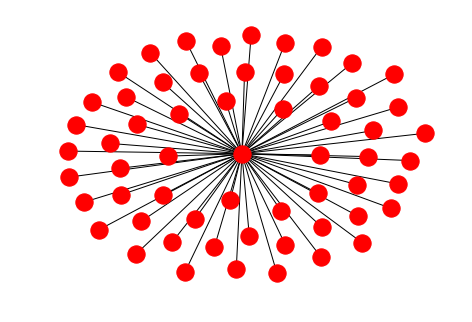

In [34]:
nx.draw(G.subgraph([G.nodes()[n] for n in np.where(assignments == assignments[485])[0]]))

In [249]:
len(np.unique(assignments))

187

In [234]:
from sklearn.metrics import normalized_mutual_info_score

In [235]:
normalized_mutual_info_score(assignments, nx.get_node_attributes(G, "group").values())

0.71058794862503527

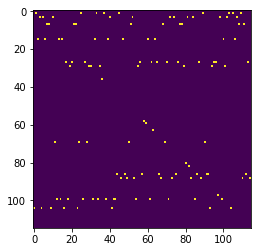

In [119]:
plt.imshow(M)

In [95]:
dist = np.linalg.matrix_power(W, 3).dot(P)

In [103]:
[G.node[i]["label"] for i in np.where(dist>0.01)[0]]

[u'YLR268W',
 u'YNL219C',
 u'YDR479C',
 u'YPL094C',
 u'YGL225W',
 u'YIR038C',
 u'YPR159CA',
 u'YIR033W',
 u'YML055W']

In [60]:
com_prob = {k: 0 for k in np.unique(assignments)}

In [61]:
for c, p in zip(assignments, dist):
    com_prob[c] += p

In [62]:
com_prob

{0: 0.078733766233765365,
 1: 0.069805194805194037,
 2: 0.10064935064934952,
 3: 0.10714285714285599,
 4: 0.086850649350648415,
 5: 0.03733766233766192,
 6: 0.11120129870129745,
 7: 0.071428571428570634,
 8: 0.089285714285713275,
 9: 0.10551948051947939,
 10: 0.052759740259739681,
 11: 0.089285714285713288}

In [63]:
S = np.diag(1./np.sqrt(D.diagonal())).dot(A).dot(np.diag(1./np.sqrt(D.diagonal())))

In [84]:
l, U = np.linalg.eigh(S)

In [85]:
l = l[::-1]
U = U[:,::-1]

In [90]:
l

array([  1.00000000e+00,   8.67727671e-01,   7.12951015e-01,
         6.12686767e-01,   3.87769460e-01,   3.51007053e-01,
         2.92791798e-01,   2.60042011e-01,   2.29089383e-01,
         1.77057148e-01,   1.35167055e-01,   9.31839984e-02,
         1.08609375e-16,   8.75487675e-17,   6.50535192e-17,
         4.01138156e-17,   2.20102858e-17,   3.09000445e-19,
        -2.48691287e-17,  -3.79906342e-17,  -6.61881905e-17,
        -1.55429990e-16,  -1.05380839e-01,  -1.59299956e-01,
        -2.68023547e-01,  -3.51778259e-01,  -3.93104541e-01,
        -4.16915851e-01,  -4.48579382e-01,  -4.97030113e-01,
        -5.69506603e-01,  -5.83333333e-01,  -6.11909588e-01,
        -7.14611347e-01])

In [86]:
pi

array([ 0.1025641 ,  0.05769231,  0.06410257,  0.03846154,  0.01923077,
        0.02564103,  0.02564103,  0.02564103,  0.03205128,  0.01282051,
        0.01923077,  0.00641026,  0.01282051,  0.03205128,  0.01282051,
        0.01282051,  0.01282051,  0.01282051,  0.01282051,  0.01923077,
        0.01282051,  0.01282051,  0.01282051,  0.03205128,  0.01923077,
        0.01923077,  0.01282051,  0.02564103,  0.01923077,  0.02564103,
        0.02564103,  0.03846154,  0.07692308,  0.10897436], dtype=float32)

In [87]:
U[:,0]

array([-0.32025631, -0.24019223, -0.25318484, -0.19611614, -0.13867505,
       -0.16012815, -0.16012815, -0.16012815, -0.17902872, -0.1132277 ,
       -0.13867505, -0.08006408, -0.1132277 , -0.17902872, -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.13867505,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.17902872, -0.13867505,
       -0.13867505, -0.1132277 , -0.16012815, -0.13867505, -0.16012815,
       -0.16012815, -0.19611614, -0.2773501 , -0.33011265])